In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pylab as plt


In [3]:
# reading a csv file
emp = pd.read_csv("E:\\Data Science\\Assignments\\15. Simple Linear Regression\\emp_data.csv")
print(emp.head())
print(".....................................................")
print("number of columns",emp.shape[1])
print("number of rows/records",emp.shape[0])

   Salary_Hike  Churn_Out_Rate
0         1580              92
1         1600              85
2         1610              80
3         1640              75
4         1660              72
.....................................................
number of columns 2
number of rows/records 10


In [7]:
emp.info()
print("...........................................")
print(emp.isnull().sum())                 #checking for null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
Salary_Hike       10 non-null int64
Churn_Out_Rate    10 non-null int64
dtypes: int64(2)
memory usage: 288.0 bytes
...........................................
Salary_Hike       0
Churn_Out_Rate    0
dtype: int64


In [8]:
emp.describe()    

,Salary_Hike,Churn_Out_Rate
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


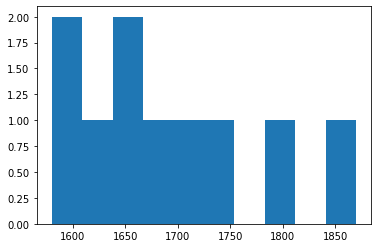

In [10]:
#analysing the data using visualization
plt.hist(emp.Salary_Hike)
plt.show()

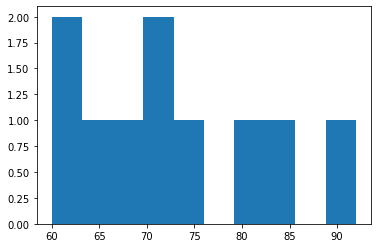

In [13]:
plt.hist(emp.Churn_Out_Rate)
plt.show()

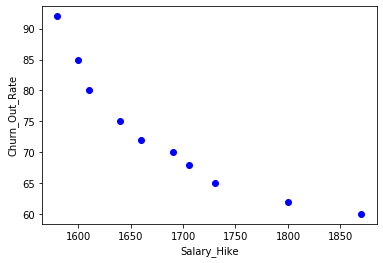

In [15]:
plt.plot(emp["Salary_Hike"],emp["Churn_Out_Rate"], "bo")
plt.xlabel("Salary_Hike")
plt.ylabel("Churn_Out_Rate")
plt.show()

In [16]:
#correlation value between feature and outcome
print(np.corrcoef(emp.Salary_Hike,emp.Churn_Out_Rate))


[[ 1.         -0.91172162]
 [-0.91172162  1.        ]]


In [18]:
#start  training model
model=smf.ols('Churn_Out_Rate~Salary_Hike', data=emp).fit()
print(model.params)        #getting models parameter
print(model.summary())    #summary of models(p value,r square value etc.)
          #r square 0.831

Intercept      244.364911
Salary_Hike     -0.101543
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Churn_Out_Rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           0.000239
Time:                        20:38:23   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [19]:
print(model.conf_int(0.05))   #95% confidence level

                      0           1
Intercept    181.291232  307.438591
Salary_Hike   -0.138845   -0.064240


In [21]:
pred=model.predict(emp.iloc[:,:])      #predict the value of Churn_Out_Rate using trained model
print(pred.head(10))

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64


In [27]:
#rmse for given model
rmse=np.sqrt(np.mean((emp.Churn_Out_Rate-pred)**2))
print(rmse)                                         #3.997 RMSE


3.997528462337793


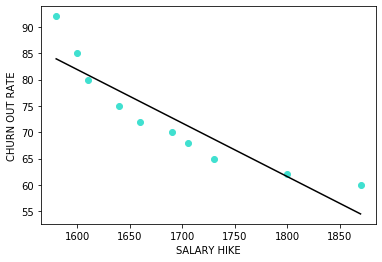

In [28]:
#visualization of regression line using matplotlib
plt.scatter(x=emp['Salary_Hike'],y=emp['Churn_Out_Rate'],color='turquoise')
plt.plot(emp['Salary_Hike'],pred,color='black')
plt.xlabel('SALARY HIKE')
plt.ylabel('CHURN OUT RATE')
plt.show()


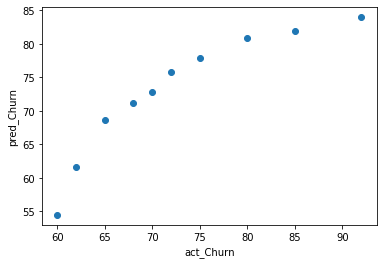

In [36]:
plt.scatter(x=emp.Churn_Out_Rate, y=pred)
plt.xlabel('act_Churn')
plt.ylabel('pred_Churn')
plt.show()                                                                    #actual churn out time vs predicted churn out time

In [38]:
#looking for alternate model like quadratic or exponential
   #quadratic model
emp["Salary_Hike_square"]=emp.Salary_Hike*emp.Salary_Hike
print(emp.head())

   Salary_Hike  Churn_Out_Rate  Salary_Hike_square
0         1580              92             2496400
1         1600              85             2560000
2         1610              80             2592100
3         1640              75             2689600
4         1660              72             2755600


In [39]:
model_quad=smf.ols("Churn_Out_Rate~Salary_Hike+Salary_Hike_square",data=emp).fit()
print(model_quad.params)
print(model_quad.summary())       # r square 0.974

Intercept             1647.011647
Salary_Hike             -1.737089
Salary_Hike_square       0.000475
dtype: float64
                            OLS Regression Results                            
Dep. Variable:         Churn_Out_Rate   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     129.6
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           2.95e-06
Time:                        21:05:05   Log-Likelihood:                -18.751
No. Observations:                  10   AIC:                             43.50
Df Residuals:                       7   BIC:                             44.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------

In [40]:
print(model_quad.conf_int(0.05))

                              0            1
Intercept           1107.738347  2186.284946
Salary_Hike           -2.365306    -1.108872
Salary_Hike_square     0.000293     0.000658


In [41]:
pred_quad=model_quad.predict(emp.iloc[:,:3])
print(pred_quad.head())

0    89.170352
1    84.663268
2    82.552343
3    76.790034
4    73.423882
dtype: float64


In [42]:
#rmse for quadratic model
rmse_quad=np.sqrt(np.mean((pred_quad-emp.Churn_Out_Rate)**2))
print(rmse_quad)                                     #1.577 rs

1.5779753028677412


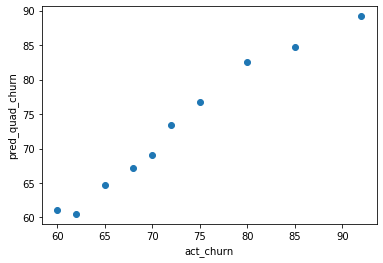

In [44]:
plt.scatter(x=emp.Churn_Out_Rate, y=pred_quad)
plt.xlabel("act_churn")
plt.ylabel("pred_quad_churn")
plt.show()

In [ ]:
     #conclusion:
       -both model linear & quadratic are not same in accuracy
       -linear model(r square=0.831,rmse=3.997)
       -quadratic model(r square=0.974, rmse=1.577)
       -The lower the RMSE value the better the model, so here quadratic model is the best fit model